Привет! Меня зовут Александр Арасланов, я провожу ревью твоей работы. Предалагю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>


Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.


Алексей, вижу, что старался и отлично справился с проектом 👍 Понравился твой ход мыслей, аккуратный код, четкая структура проекта 😉 Молодец, что оборачиваешь код в функции для автоматизации тех или иных моментов. Вижу, что знаком с библиотеками по визуализации, графики построил хорошие 😉 С твоими выводами согласен, проверка гипотез проведена успешно. Проект принимаю, успехов в дальнейшей учебе 😉
___

# Определение перспективного тарифа для телеком компании

<div class="alert alert-info">В данном исследовании, нам необходимо проанализировать данные два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нам необхоимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Задача - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
</div>

У нас описание каждого из тарифов:

#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

</div>

Исходя из вышеперечислиненной информации, мы можем разделить наше исследование на следующие этапы:

I Этап. Изучение общей информации

<a href='#1'> 1. Анализ полученных данных, загрузка библиотек для дальнейшей работы с Data Frame. </a>

II Этап. Предобработка данных

<a href='#2'>1.Подготовка пользовательских данных для анализа</a><br>
<a href='#3'>2.Подсчет значений для каждого пользователя</a><br>
<a href='#4'>3.Расчет помесячной выручки с каждого пользователя</a><br>

III Этап. Исследовательский анализ данных

<a href='#5'>1.Анализ длительности разговоров </a><br>
<a href='#6'>2.Анализ количества собщений </a><br>
<a href='#7'>3.Анализ объема интернет-трафика </a><br>
<a href='#8'>4.Анализ выручки </a><br>

IV Этап. Проверка гипотез и пояснения

<a href='#9'>1. Средняя выручка тарифов "smart" и "ultra" </a><br>
<a href='#10'>2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов </a><br>

V Этап. Вывод

<a href='#11'>1. Общий вывод по проекту</a>

<a id='1'></a>
# Изучение общей информации


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from collections import Counter
from pandas import Timestamp
from scipy import stats as st
import numpy as np

#выводим все колонны на экран,чтобы не было ... посредине датасета
pd.set_option('max_columns', None)

df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')
 
df_all = [df_calls, df_internet, df_messages, df_tariffs, df_users]
for file in df_all:
        display(file.describe()) # выводим массивы

# столбец 'Unnamed: 0' удаляем
df_internet.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_internet.reset_index(drop=True)

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Открываем файл с данными и изучаем общую информацию о таблицах. Для этого пишем цикл и выводим все таблицы разом.
Дропаем столбец 'Unnamed: 0' поскольку он не несет никакой информации.

<a id='2'></a>
# Предобработка данных


In [2]:
# пишем функцию, которая создаем гистограмму по параметрам
def hist_func(data, column, range_1, range_2):
    data.hist(column, bins='auto',figsize=(13,4), range=(range_1, range_2))
    plt.title('user_id')
    plt.figure(figsize=(13, 4))
    sns.boxplot(data[column])
    plt.show()
    plt.close()


# пишем функцию, которая заменяет на int 
def func_int(data, column):
    data[column] = data[column].astype(np.int64, errors='ignore')
    
        
# пишем функцию, которая будеит преобразовыывать дату в нужный формат и добавляет индекс даты
def date_type(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y/%m/%d %H:%M:%S')
    data[column] = pd.to_datetime(data[column], format='%Y/%m/%d')
    data[column + '_month'] = pd.DatetimeIndex(data[column]).month
    

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Молодец, что не забыл длительность округлить до верхних значений 👍</div> 

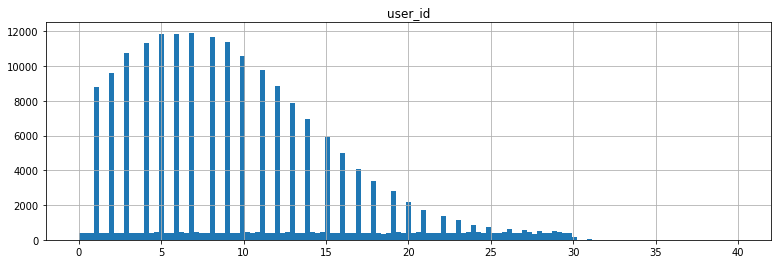

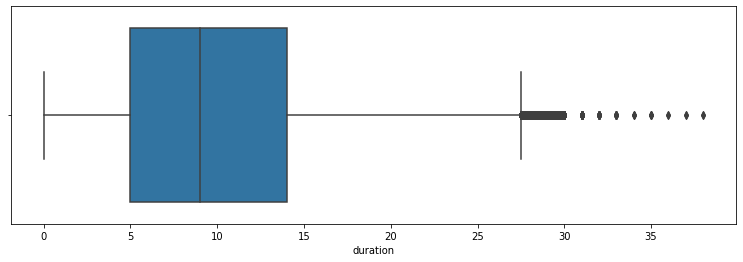

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id                 202607 non-null int64
call_date          202607 non-null datetime64[ns]
duration           202607 non-null float64
user_id            202607 non-null int64
call_date_month    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 7.7 MB


In [3]:
# обрабатываем  df_calls
# проеряем наличие пропусков - пропуски отсутсвуют
#df_calls.isna().sum()

# округлим float
#df_calls['duration'] = np.ceil(df_calls['duration'])

# преобразуем в int
df_calls['duration'] = np.ceil(df_calls['duration']).astype('Int64', errors='ignore')
func_int(df_calls, 'id')
date_type(df_calls, 'call_date')

# заменим нулевые значения в столбце рандомными числами от 0 до 30 минут   
def rand_duration(row):
    if row['duration'] == 0:
        return np.random.uniform(low=0, high=30)
    return row['duration']
 
df_calls['duration'] = df_calls.apply(rand_duration, axis=1)

# выводим гистограмму и визуализируем наш столбец со временем звонка
hist_func(df_calls, 'duration', 0, 40) 

# проверим наличие дубликатов
#df_calls.duplicated().sum()

df_calls.info()

Пропуски отсутствуют,заменили типы данных во всех столбцах, кроме call_date, поскольку там и так нормальный формат. По столбцу duration значительное кол-во нулевых значений, из гистограммы мы видим, что это явня аномалия, поэтому подправляем эти данные и заменим их случайным чилом от 0 до 30, исходя из имеющихся данных по столбцу.

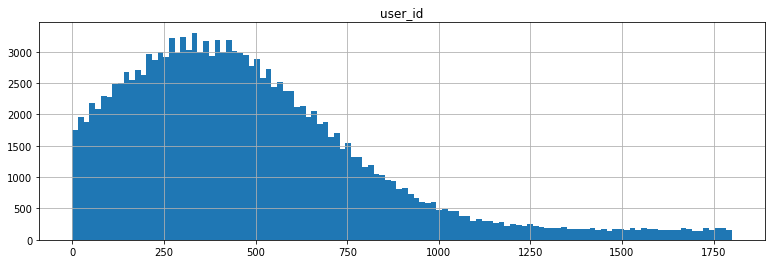

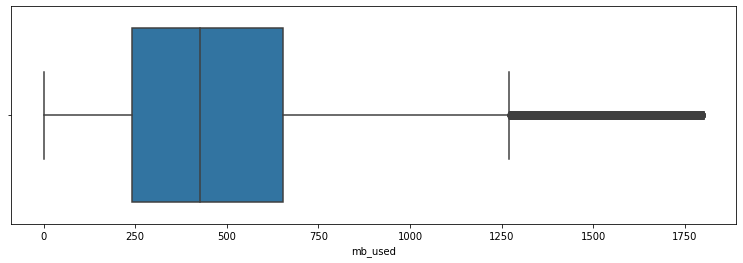

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id                    149396 non-null int64
mb_used               149396 non-null float64
session_date          149396 non-null datetime64[ns]
user_id               149396 non-null int64
session_date_month    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


In [4]:
# обрабатываем df_internet
# проеряем наличие пропусков - пропуски отсутсвуют
#df_internet.isna().sum()

# округлим float
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

# преобразуем в int
func_int(df_internet, 'mb_used')
func_int(df_internet, 'id')
date_type(df_internet, 'session_date')

# заменим нулевые значения в столбце рандомными числами от 0 до 1700 мб   
def rand_duration(row):
    if row['mb_used'] == 0:
        return np.random.uniform(low=0, high=1800)
    return row['mb_used']
 
df_internet['mb_used'] = df_internet.apply(rand_duration, axis=1)


hist_func(df_internet, 'mb_used', 0, 1800) 

# проверим наличие дубликатов
#df_internet.duplicated().sum()
df_internet.info()

Все остальные столбцы приводим в порядок по типам данных.
По столбцу mb_used мы снова видим аномалию по нулевым значениям. Поэтому заменяем данные значения на более корректные, не будем применять медиану или среднее, а применим, по-моему мнению самый оптимальный вариант - заменить случайным числом.

In [5]:
# обрабатываем  df_messages
# проеряем наличие пропусков - пропуски отсутсвуют
#df_messages.isna().sum()

# округлим float
#df_messages['id'] = np.ceil(df_messages['id'])

# преобразуем в int
func_int(df_messages, 'id')
date_type(df_messages, 'message_date')


# проверим наличие дубликатов
#df_messages.duplicated().sum()

df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id                    123036 non-null int64
message_date          123036 non-null datetime64[ns]
user_id               123036 non-null int64
message_date_month    123036 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.8 MB


Нулевые значения отсутствуют. Заменяем тип данных в столбце id и преобразуем дату.

In [6]:
# обрабатываем df_tariffs
# проеряем наличие пропусков - пропуски отсутсвуют
#df_tariffs.isna().sum()

# проверим наличие дубликатов
#df_tariffs.duplicated().sum()

df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В данном столбце с данными все в порядке, ничего исправлять не нужно.

In [7]:
# обрабатываем df_users
# проеряем наличие пропусков - churn_date

# видим пропуски в churn_date, заменим их сегодняшним числом, чтобы заполнить пропуски
df_users['churn_date'] = df_users['churn_date'].fillna(Timestamp('20201214'))
df_users['churn_date_month'] = pd.DatetimeIndex(df_users['churn_date']).month
date_type(df_users, 'reg_date')



df_users.isna().sum()

user_id             0
age                 0
churn_date          0
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
churn_date_month    0
reg_date_month      0
dtype: int64

В данной таблице мы исправляем формат дат в столбцах и остальные столбцы проверяем на наличие выбросов, через методы describe(), min(), max().
По данным здесь все чисто.


<a id='3'></a>
### Подсчет значений для каждого пользователя

In [8]:
# сводная звонков по месяцам

monthly_df_calls = df_calls.pivot_table(index= ['user_id','call_date_month'],
                                       values= 'duration', 
                                       aggfunc=['count', 'sum']).reset_index()

monthly_df_calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']

monthly_df_calls['calls_count'] = np.ceil(monthly_df_calls['calls_count']).astype('Int64')
monthly_df_calls['calls_sum'] = np.ceil(monthly_df_calls['calls_sum']).astype('Int64')


monthly_df_calls.isna().sum()

user_id        0
month          0
calls_count    0
calls_sum      0
dtype: int64

In [9]:
# сводная по кол-ву отправленных собщений по месяцам

monthly_df_messages = df_messages.pivot_table(index=['user_id', 'message_date_month'],
                                             values='id',
                                             aggfunc='count').reset_index()

monthly_df_messages.columns = ['user_id', 'month', 'messages_count']
monthly_df_messages.isna().sum()

user_id           0
month             0
messages_count    0
dtype: int64

In [10]:
# сводная по трафику в месяцах

monthly_df_internet = df_internet.pivot_table(index=['user_id','session_date_month'],
                                             values='mb_used',
                                             aggfunc='sum').reset_index()

monthly_df_internet.columns = ['user_id', 'month', 'mb_internet_sum']
monthly_df_internet['mb_internet_sum'] = np.ceil(monthly_df_internet['mb_internet_sum']).astype('Int64')

# добавим столбец с гб
monthly_df_internet['gb_internet_sum'] = np.ceil(monthly_df_internet['mb_internet_sum'] / 1024).astype('Int64')

monthly_df_internet.isna().sum()

user_id            0
month              0
mb_internet_sum    0
gb_internet_sum    0
dtype: int64

In [11]:
# теперь объединяем 3 наших сводных таблицы в одну по месяцам

monthly_users_stat = monthly_df_calls.merge(
    monthly_df_messages,
    on=['user_id', 'month'],
    how='outer'
) .merge(
    df_users,
    on=['user_id'],
    how='left'
) .merge(
    monthly_df_internet,
    on=['user_id', 'month'],
    how='outer'
)



monthly_users_stat.sample(5)
#monthly_users_stat.isna().sum()

,user_id,month,calls_count,calls_sum,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_date_month,reg_date_month,mb_internet_sum,gb_internet_sum
958,1154,8,27,242,15.0,19.0,2020-12-14 00:00:00,Волжский,Марина,Тихомирова,2018-06-02,smart,12.0,6.0,15840,16
2604,1410,11,69,670,21.0,25.0,2020-12-14 00:00:00,Нижний Тагил,Гарри,Ильин,2018-08-28,smart,12.0,8.0,36097,36
1262,1200,6,83,857,44.0,36.0,2020-12-14 00:00:00,Санкт-Петербург,Тамара,Ларионова,2018-04-28,ultra,12.0,4.0,20262,20
788,1125,12,37,354,2.0,69.0,2020-12-14 00:00:00,Волгоград,Сабина,Озерова,2018-09-01,smart,12.0,9.0,20938,21
2104,1337,3,21,232,8.0,42.0,2020-12-14 00:00:00,Вологда,Олег,Суслов,2018-01-15,smart,12.0,1.0,24037,24


In [12]:
# мы видим, что в общей таблице образовались пропуски при слиянии merge(), заменим их нулевыми значениями
for column in ['calls_count', 'calls_sum', 'messages_count',
               'age', 'mb_internet_sum', 'gb_internet_sum']:
    monthly_users_stat[column] = monthly_users_stat[column].fillna(0).astype('Int64')

for column in ['first_name', 'last_name', 'city']:
    monthly_users_stat[column] = monthly_users_stat[column].fillna('undefined')
    
# здесь мы заполняем пропуски как можно точнее исходя из данных таблицы и сопоставляя их.
monthly_users_stat['churn_date'] = monthly_users_stat['churn_date'].fillna(Timestamp('20201214'))
monthly_users_stat['churn_date_month'] = monthly_users_stat['churn_date_month'].fillna(12).astype('Int64')
monthly_users_stat['reg_date'] = monthly_users_stat['reg_date'].fillna(Timestamp('20180815'))
monthly_users_stat['reg_date_month'] = monthly_users_stat['reg_date_month'].fillna(5).astype('Int64')
monthly_users_stat['tariff'] = monthly_users_stat['tariff'].fillna('smart')

# все пропуски заполнены, теперь нам неободимо добавить столбец с gb
df_tariffs['gb_per_month_included'] = np.ceil(df_tariffs['mb_per_month_included'] / 1024).astype('Int64')

#monthly_users_stat.isna().sum()
#monthly_users_stat.sample(5)
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


В данном блоке мы создали сводные таблицы и сгруппировали их по месяцам согласно поставленной задаче. Зате мы объединили все 3 сводные табоицы методом merge() для удобства в дальнейшей работе с данными. После объединения у нас образвались пропуски, которе портили данные и при обычной замене нулем менялись типы данных, поэтому такмгде можно мы прописали цикл со столбцами имеющими пропуски и заменили их на нулевое значение, в остальныхслучаях мы обращались локально к столбцам, чтобы заполнить пропуски и исправить тип данных так, чтобы функция ниэе работала корректно.

<a id='4'></a>
#### Расчет помесячной выручки с каждого пользователя

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Отличная функция для расчета дохода 👍</div> 

In [13]:
def monthly_revenue(row):

    money = 0
    
    tariff = row['tariff']
    calls_sum = row['calls_sum']
    messages_count = row['messages_count']
    gb_internet_sum = row['gb_internet_sum']
    tariff_settings = df_tariffs[df_tariffs['tariff_name'] == tariff]
    
    #print(tariff_settings.head())
    
    # считаем разницу между потраченными минутами, трафиком смс включенных в абонентскую плату.
    difference_calls = calls_sum - tariff_settings['minutes_included'].values[0]
    #print(difference_calls)
    difference_messages = messages_count - tariff_settings['messages_included'].values[0]
    #print(difference_messages)
    difference_internet = gb_internet_sum - tariff_settings['gb_per_month_included'].values[0]
    #print(difference_internet)
    
    # если пользователь вышел за пределы лимитов, то рассчитывается доп.плата

    money+= max(0, difference_calls) * tariff_settings['rub_per_minute'].values[0]
    money+= max(0, difference_messages) * tariff_settings['rub_per_message'].values[0]
    money+= max(0, difference_internet) * tariff_settings['rub_per_gb'].values[0]
    
    # добавление ежемесячной абонентской платы
    money += tariff_settings['rub_monthly_fee'].values[0]

    return money


monthly_users_stat['monthly_revenue'] = monthly_users_stat.apply(monthly_revenue, axis=1)
monthly_users_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
user_id             3214 non-null int64
month               3214 non-null int64
calls_count         3214 non-null Int64
calls_sum           3214 non-null Int64
messages_count      3214 non-null Int64
age                 3214 non-null Int64
churn_date          3214 non-null object
city                3214 non-null object
first_name          3214 non-null object
last_name           3214 non-null object
reg_date            3214 non-null datetime64[ns]
tariff              3214 non-null object
churn_date_month    3214 non-null Int64
reg_date_month      3214 non-null Int64
mb_internet_sum     3214 non-null Int64
gb_internet_sum     3214 non-null Int64
monthly_revenue     3214 non-null int64
dtypes: Int64(8), datetime64[ns](1), int64(3), object(5)
memory usage: 477.1+ KB


Для расчета помесячной выручки с каждого пользователя мы создали функцию, которая помогла нам сократить код и время для расчетов. В функции мы берем данные из сгруппированных сводных таблиц и таблицы с тарифами. После корректно доработчки функци у нас появляется столбец monthly_revenue, в котором мы видим помесячную выручки с каждого пользователя. 

### Выод по предобработке

Здесь мы не стали объединять все фреймы в один, поскольку для этого нет необходимсоти, мы можем изучить каждый фрейм отдельно и так получить более детальную информацию.

Мы заменили типы данных в столбцах, где необходимо преобраовали дату и заменили выбросы случайными числами, чтобы сохранять случайность распеределния в данных, которые мы не знаем как заполнить.

Шаг предобработки данных завершен, все пропуски обработаны и заменены актуальной датой, типы данных заменены на корректные и выполнены все рассчеты по каждому пользователю, поэтому дальше мы уже можем переходить к анализу данных.







<a id='5'></a>
# Исследовательский анализ данных


In [14]:
# пишем функцию, по которой будем смотреть разницумежду тарифами по месяцам
# Чтобы сложилось общее видение распределени и это поможет нам в анализе данных


def analyze_tariffs(column, column_label, unit, kde=True):
    # выделяем данные ссответсвующие тарифам
    smart_data = monthly_users_stat[monthly_users_stat['tariff'] == 'smart']
    ultra_data = monthly_users_stat[monthly_users_stat['tariff'] == 'ultra']
    # определяем кол-во столбцов на гистограмме
    bins_smart = int(1 + pd.np.log2(smart_data.shape[0]))
    bins_ultra = int(1 + pd.np.log2(ultra_data.shape[0]))
    
    # строим плотность по тарифам
    plt.figure(figsize=(29.7 / 3, 21. / 3))
    sns.distplot(a=smart_data[column], kde=kde, bins=bins_smart, label='smart')
    sns.distplot(a=ultra_data[column], kde=kde, bins=bins_ultra, label='ultra')
    plt.title(f' {column_label}. Распределение по тарифам')
    plt.ylabel('Плотность')
    plt.xlabel(unit)
    
    plt.show()

    # изучаем среднее для каждого месяца по тарифам
    (monthly_users_stat
    .pivot_table(index='tariff', columns='month', values=column, aggfunc='mean')
    .T
    .plot(kind='bar', alpha=0.5, figsize=(29.7 / 3, 21. / 3))
    )
    plt.title(f' {column_label}. Cреднее по месяцам по 2 тарифам'+"\n")
    plt.ylabel('Месяцы')
    plt.xlabel(unit)
    
    plt.show()
    
    # добавляем гистограмму по месяцам
    (monthly_users_stat
    .pivot_table(index='tariff', columns='month', values=column, aggfunc='mean')
    .T
    .plot(kind='hist', alpha=0.5, bins=15, figsize=(29.7 / 3, 21. / 3))
    )
    plt.title(f' {column_label}. Гистограмма распеределения среднего по месяцам по 2 тарифам'+"\n")
    plt.ylabel('Частотность')
    plt.xlabel(unit)
    
    plt.show()
    
    # добавляем диаграмму размаха по месяцам
    (monthly_users_stat
    .pivot_table(index='tariff', columns='month', values=column, aggfunc='mean')
    .T
    .plot(kind='box', figsize=(29.7 / 3, 21. / 3))
    )
    plt.title(f' {column_label}. Диаграмма размаха среднего по месяцам по 2 тарифам'+"\n")
    plt.ylabel('Тариф')
    plt.xlabel(unit)
    
    plt.show()

<a id='5'></a>
##### Анализ длительности разговоров

<div class="alert alert-warning">
<h2>Комментарий ревьюера</h2>

Возможно задание формулировано не совсем очевидно. Не понимаю, для чего ты строил графики распределений дисперсии, среднего и ср.кв.откл.
Данные показатели нужно было просто рассчитать для каждого тарифа и вывести их. А гистограммы можно было бы построить непосредственно для длительности звонков, количества сообщений, интернет трафки. Чтобы посмотреть на их распределения внутри тарифов. Причем лучше не агрегировать данные в средние данные по месяцам, потому что тогда количество наблюдей уменьшается до 12. Что совсем не айс. А использовать именно исходную таблицу monthly_users_stat
</div> 

In [15]:
# средняя длительность телефонных разговоров
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='calls_sum',
                    aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,545.841054,697.589392
std,103.716458,110.439942
min,288.000000,405.958333
25%,541.101440,666.891534
50%,566.151817,722.214395
75%,602.980861,756.776878
max,671.498516,841.705036


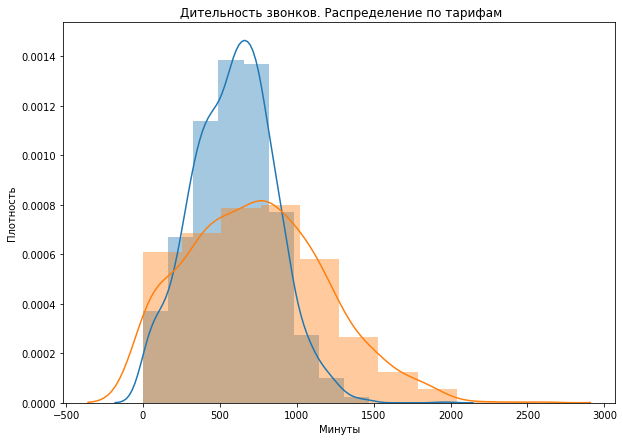

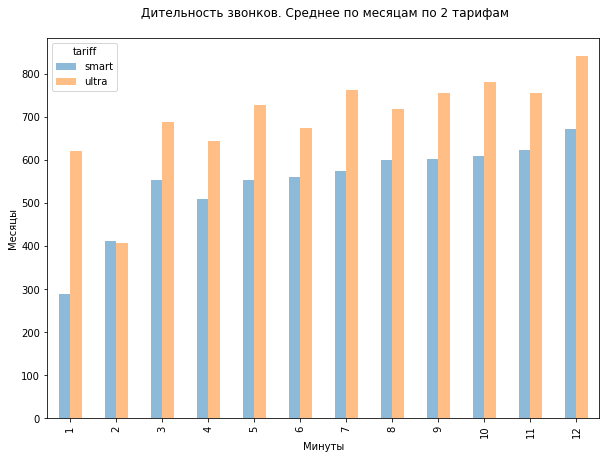

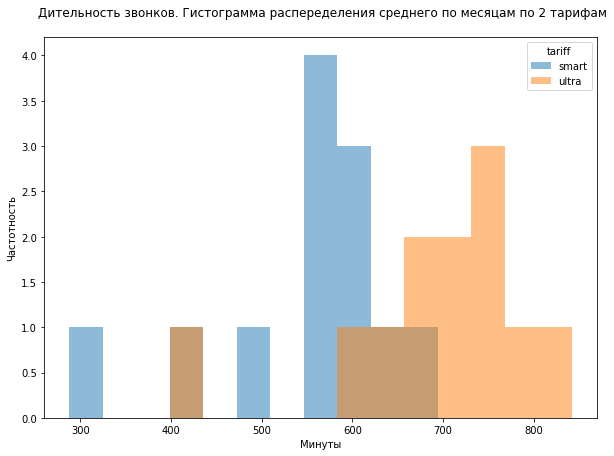

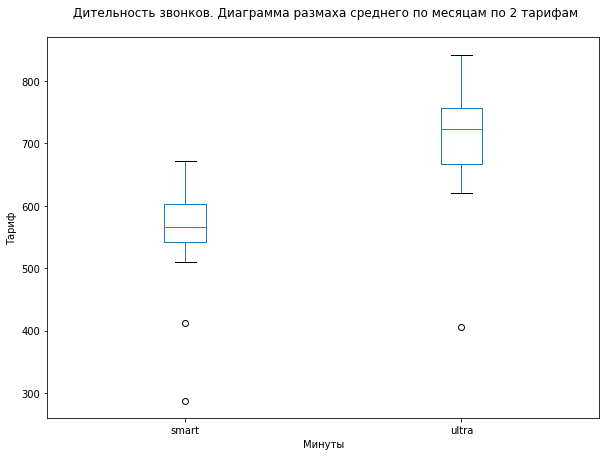

In [16]:
# Вызываем нашу функцию, чтобы посмотреть данные по звонкам

analyze_tariffs('calls_sum', 'Дительность звонков', 'Минуты')

In [17]:
# Дисперсия длительности телефонных разговоров
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='calls_sum',
                    aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,65496.534763,186615.784388
std,6149.136913,29429.954761
min,49814.242424,134185.741789
25%,64730.899273,168100.297842
50%,67652.256856,188278.503349
75%,68048.471259,203688.566247
max,73526.423361,243117.137003


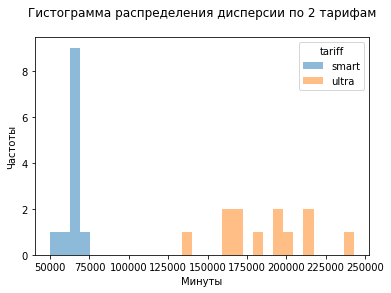

In [18]:
# строим гистограмму распределения по дисперсии

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='calls_sum',
                    aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии по 2 тарифам'+ '\n')
plt.xlabel('Минуты')
plt.ylabel('Частоты')
plt.show()

Из гистограммы мы видим, что ultra и smart даже не пересекаются между собой и сильно различаются.

In [19]:
# Стандартное отклонение длительности телефонных разговоров
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='calls_sum',
                    aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,255.643280,430.750698
std,12.492103,34.159320
min,223.191045,366.313720
25%,254.422575,409.986701
50%,260.100471,433.893057
75%,260.860833,451.280832
max,271.157562,493.069100


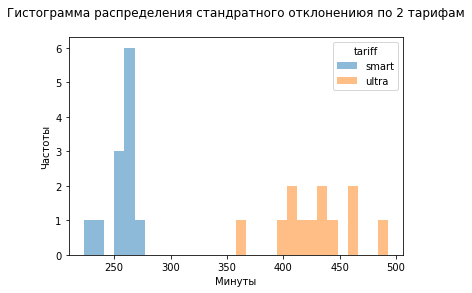

In [20]:
# строим гистограмму распределения по стандратному отклонению

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='calls_sum',
                    aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандратного отклонениюя по 2 тарифам'+ '\n')
plt.xlabel('Минуты')
plt.ylabel('Частоты')
plt.show()

Здесь мы так же наблюдаем существенные разлчия как и на графике выше.

##### Вывод по звонкам
Из гистограммы мы видим, что разброс у ultra по длительности звонков больше, чем у smart. Т.е. на ultra пользователи делают больше звонков по длительности, но так же мы видим, что они полностью не реализуют возможности тарифа, не используют предоставленные 3000 минут, а только около 1500 - 2000.

Так же можем выделить интересное замечание о сезонности, летом люди разговаривают меньше по времени, чем в зимний период. Может быть это связано с тем, что летом люди чаще выходят из дома и больше взаимодействуют, а зимоц напротив, предпочитают быть в тепеле, но не терять связь.

Так же, из 2 гистограммы мы видим, что по ultra в январе среднее по звонкам сильно выше, чем на smart. А в феврале падает и тарифы на одном уровне. Скорее всего, это связано с ограниченным кол-м дней в феврале.

На 3 гистограмме мы можем выделить следующий интересный момент, что у ultra от месяца к месяцу большой разброс в средней продолжительности звонков, чем у smart. Те. ultra реагирует на сезонность.

И наконец, мы переходим к boxplot и видим, что наши ящики находятся на разных уровнях, так же как и медаины, это подтверждает данные о том, что на ultra длительнсть звонков дольше. На обоих ящиках есть выбросы, это данные по январю и февралю, где у нас большая разница в данных.

Таким образом, пот звонкам мы выдвигаем гипотезу о том, что на ultra звонки дольше и зимой они дольше, чем летом.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Отличные выводы и наблюдения 😉 Молодец, что так подробно все расписываешь и объясняешь свои наблюдения</div> 

<a id='6'></a>
##### Анализ количества собщений

In [21]:
# среднее кол-во сообщений
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='messages_count',
                    aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,31.390540,43.763692
std,5.107273,12.269111
min,18.235294,21.958333
25%,31.510114,33.407658
50%,33.638380,45.082721
75%,33.767242,53.162979
max,35.994065,60.611511


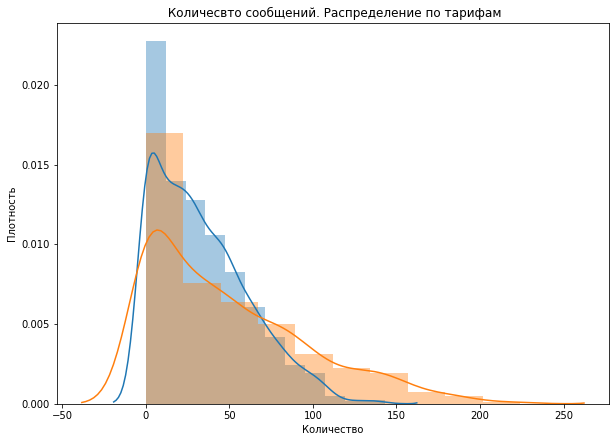

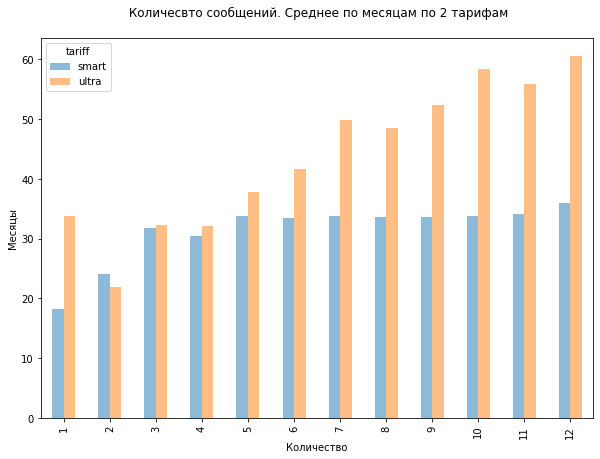

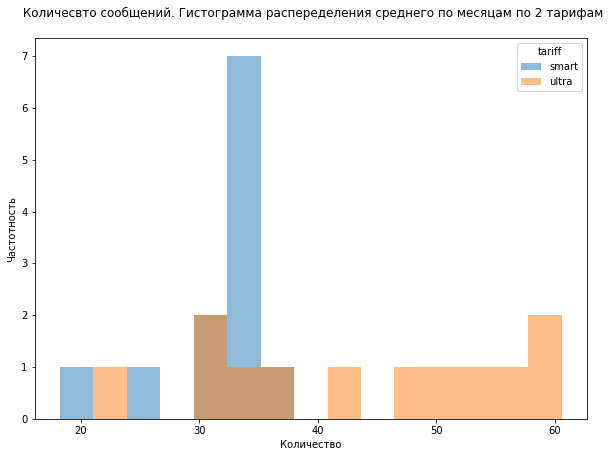

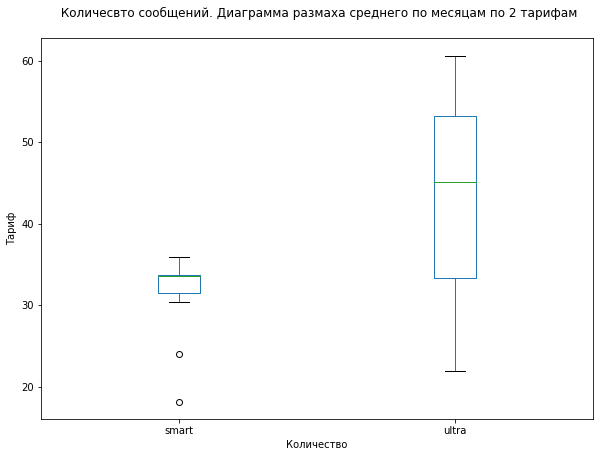

In [22]:
# Вызываем нашу функцию, чтобы посмотреть данные по сообщениям

analyze_tariffs('messages_count', 'Количесвто сообщений', 'Количество')

In [23]:
# Дисперсия длительности телефонных разговоров
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='messages_count',
                    aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,715.220460,1914.023535
std,185.656028,647.032273
min,262.367201,716.824275
25%,690.150927,1572.156694
50%,795.252815,2069.576575
75%,809.132772,2398.269174
max,934.952346,2697.181661


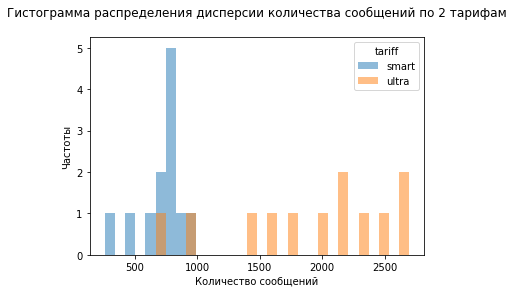

In [24]:
# строим гистограмму распределения по дисперсии

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='messages_count',
                    aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии количества сообщений по 2 тарифам'+ '\n')
plt.xlabel('Количество сообщений')
plt.ylabel('Частоты')
plt.show()

In [25]:
# Стандартное отклонение по кол-ву соодщений
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='messages_count',
                    aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,26.473363,43.062416
std,3.960925,8.066894
min,16.197753,26.773574
25%,26.253361,39.633262
50%,28.200107,45.483387
75%,28.445171,48.969954
max,30.576990,51.934398


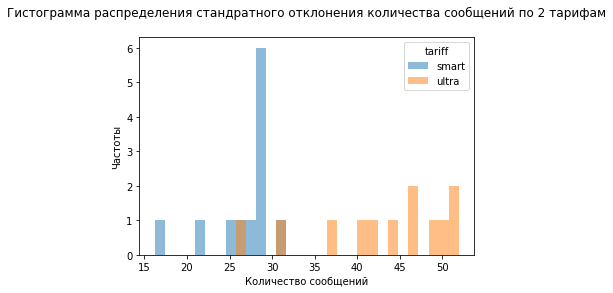

In [26]:
# строим гистограмму распределения по стандратному отклонению

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='messages_count',
                    aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандратного отклонения количества сообщений по 2 тарифам'+ '\n')
plt.xlabel('Количество сообщений')
plt.ylabel('Частоты')
plt.show()

##### Ввывод по кол-ву сообщений
Исходя из графиков мы снова видим, что по тарифу smart люди пишут стабильное кол-во сообщений в течение года, а вот на ultra и пишут достаточно большее кол-во чем на smart и есть сезонные размахи в данных.
Но так же мы видим, что несмотря на условия в 1000 сообщений, всрднем реализуется только около 60 сообщений в месяц. Т.е. мы можем сформировать гипотезу о том, что люди не реализуют все условия тарифа по кол-ву сообщений.


<a id='7'></a>
##### Анализ объема интернет трафика

In [27]:
# среднее по интернет-трафику
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='gb_internet_sum',
                    aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,21.738849,19.809511
std,3.761971,3.120701
min,12.352941,13.125000
25%,21.156534,18.985611
50%,22.862471,20.926736
75%,23.807418,21.471969
max,26.169139,23.611511


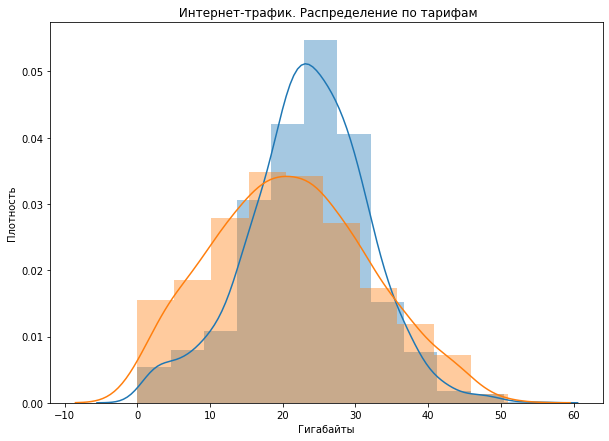

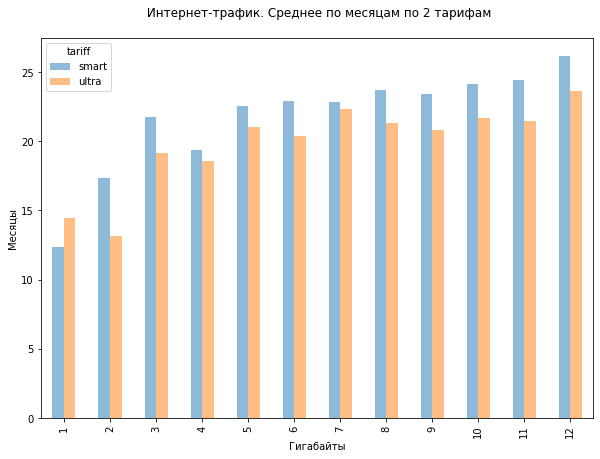

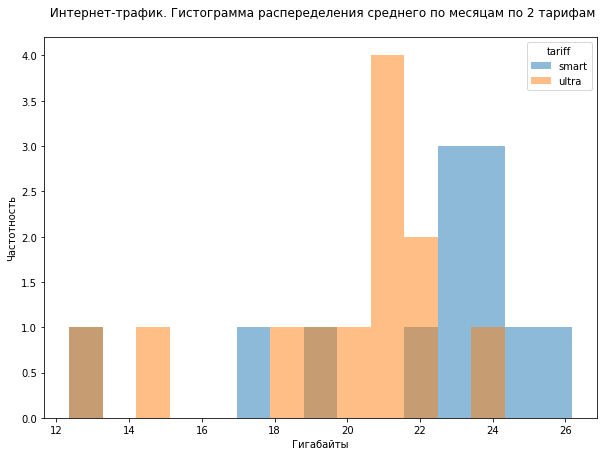

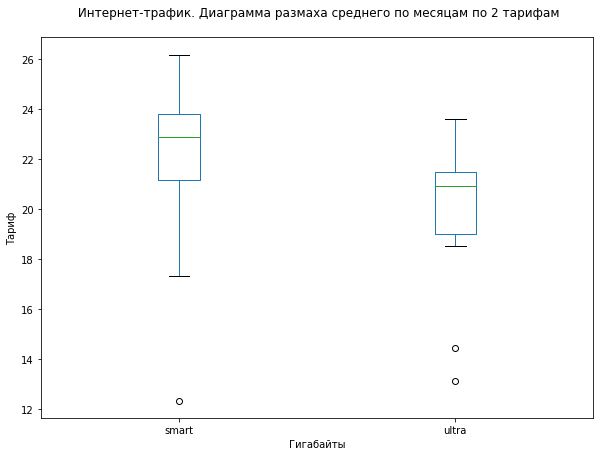

In [28]:
# Вызываем нашу функцию, чтобы посмотреть данные по трафику

analyze_tariffs('gb_internet_sum', 'Интернет-трафик', 'Гигабайты')

In [29]:
# Дисперсия длительности телефонных разговоров
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='gb_internet_sum',
                    aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,66.435140,107.888833
std,8.261626,24.715024
min,54.468963,43.277778
25%,59.197344,101.218744
50%,65.364610,109.168474
75%,70.204887,120.727910
max,80.417112,142.675676


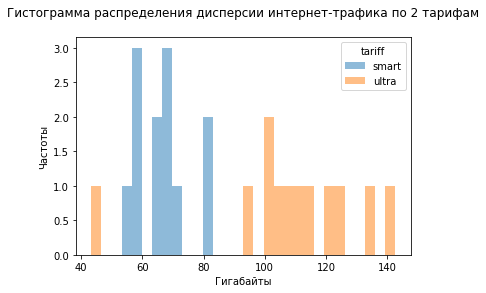

In [30]:
# строим гистограмму распределения по дисперсии

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='gb_internet_sum',
                    aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии интернет-трафика по 2 тарифам'+ '\n')
plt.xlabel('Гигабайты')
plt.ylabel('Частоты')
plt.show()

In [31]:
# Стандартное отклонение по кол-ву соодщений
monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='gb_internet_sum',
                    aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,8.136560,10.307352
std,0.502576,1.340555
min,7.380309,6.578585
25%,7.693973,10.060658
50%,8.084474,10.448340
75%,8.378314,10.987371
max,8.967559,11.944692


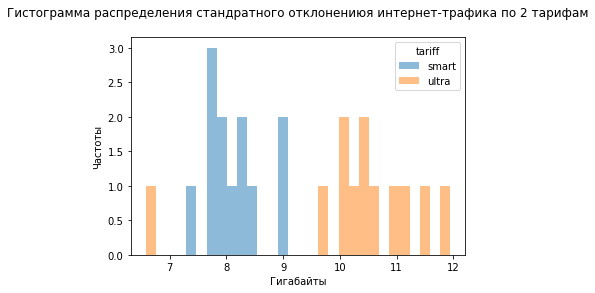

In [32]:
# строим гистограмму распределения по стандратному отклонению

(monthly_users_stat.pivot_table(
                    index='tariff', 
                    columns='month',
                    values='gb_internet_sum',
                    aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандратного отклонениюя интернет-трафика по 2 тарифам'+ '\n')
plt.xlabel('Гигабайты')
plt.ylabel('Частоты')
plt.show()

##### Вывод по интернет трафику
По трафику мы видим, что на ultra люди укладываются в ограничения по интернету, а вот на smart люди дотстаточно часто переплачивают из-за ограничений. 
Здес мы можем сформировать гипотезу о том, что выручка по smartбудет больше, чем по ultra, т.к. люди не укалдываются в тариф и переплачивают за лимит.

<a id='8'></a>
#### Анализ выручки

In [33]:
# создаем сводную таблицу по срднему доходу на пользователя
mean_revenue_per_user = monthly_users_stat.pivot_table(
                                            index='user_id',
                                            values='monthly_revenue',
                                            aggfunc='mean').reset_index()
mean_revenue_per_user.columns = ['user_id', 'monthly_revenue_per_user']
mean_revenue_per_user.head()

,user_id,monthly_revenue_per_user
0,1000,1950.0
1,1001,2538.5
2,1002,2950.0
3,1003,1950.0
4,1004,1950.0


In [34]:
# сединяем новую сводную с предыдущей общей сводной таблицей
monthly_users_stat = monthly_users_stat.merge(df_users[['user_id', 'city']], on='user_id', how='left')
df_users=df_users.merge(mean_revenue_per_user, on='user_id', how='left')

<div class="alert alert-warning">
<h2>Комментарий ревьюера</h2>

На втором графике нужно бы поменять подписи осей местами</div> 

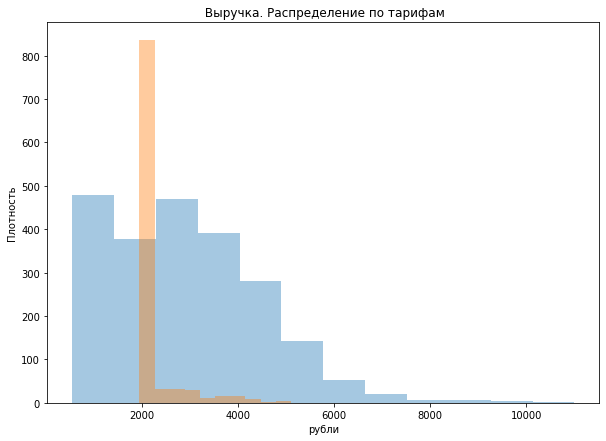

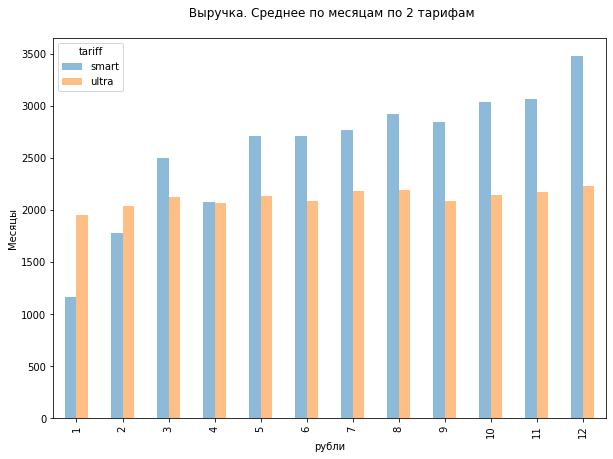

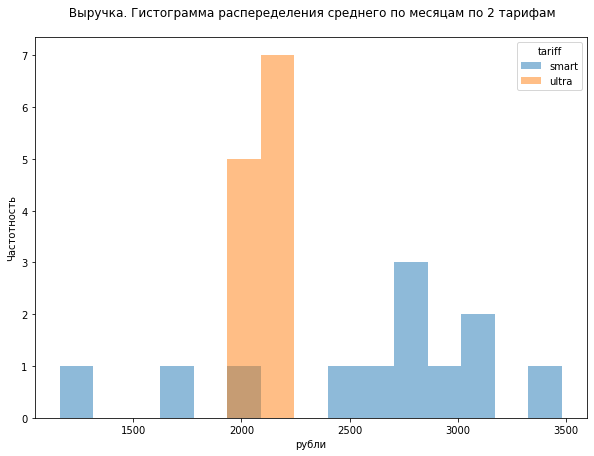

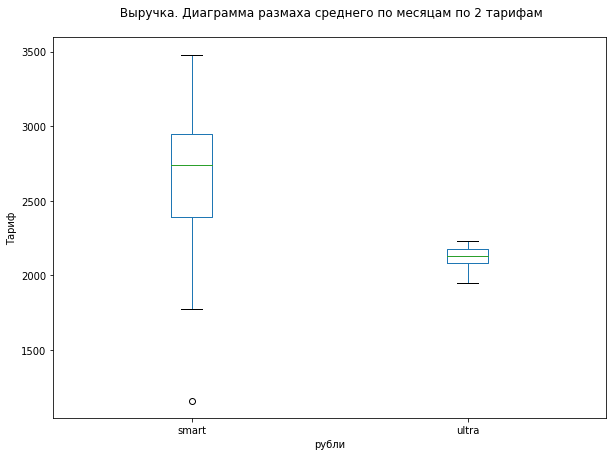

In [35]:
# Вызываем нашу функцию, чтобы посмотреть данные по выручке

analyze_tariffs('monthly_revenue', 'Выручка', 'рубли', kde=False)

Из данных мы видим, что на ultra люди платят стабильно одну сумму и им хватает услуг на месяц, в то время как на smart мы видим разброс по данным, что говорит о том, что люди не укладываются в предоставленный лимит и делают доп.покупки услуг.
Т.е. мы формируем гипотезу о том, что выручка по тарифу smart больше, чем по тарифу ultra. И тариф smart не выгоден для пользователя, а вот ultra несмотря на изначальную выше стоимсоть, получается выгоднее.

<a id='9'></a>
# Проверка гипотез и пояснения

### Средняя выручка тарифов "smart" и "ultra" различаются

H0 - Средняя выручка пользователей тарифов <b>равны</b>., т.е. средние значения равны

H1 - Средняя выручка пользователей тарифов <b>не равны</b>, т.е. средние значения различаются (не равны)

Для проверки гипотезы применим критерий p-value, т.к. он лучше всего подходит в данном случае.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Гипотезы сформулированы верно 👍 Молодец</div> 

In [36]:
sample_1 = monthly_users_stat[monthly_users_stat['tariff']=='ultra']['monthly_revenue']
sample_2 = monthly_users_stat[monthly_users_stat['tariff']=='smart']['monthly_revenue']
result = st.ttest_ind(sample_1, sample_2)
alpha = .05

print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.5631333919568902e-42
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что маловероятна случайность результата теста гипотезы. А значит, у нас недостаточно оснований считать, что выборки равны. Поэтому мы принимаем альтернативную гипотезу.

<a id='10'></a>
### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 - Средняя выручка пользователей из Москвы <b>не отличается</b> от выручки пользователей из других регионов, т.е. средние значения равны

H1 - Средняя выручка пользователей из Москвы <b>отличается</b> от выручки пользователей из других регионов, т.е. средние значения различаются (не равны)

Для проверки гипотезы применим критерий p-value, т.к. он так же хорошо подходит в данном случае.

In [37]:
sample_1 = monthly_users_stat[monthly_users_stat['city_x']=='Москва']['monthly_revenue']
sample_2 = monthly_users_stat[monthly_users_stat['city_x']!='Москва']['monthly_revenue']
result = st.ttest_ind(sample_1, sample_2)
alpha = .05

print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.1206354656653749
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что Средняя выручка пользователей из Москвы и из других регионов не отличается и что ввысока вероятность случайно получить такое значение. А значит, у нас недостаточно оснований считать, что выборки не равны.

<a id='11'></a>
# Общий вывод по проекту

Активность пользователей тарифных планов значительно отличаются друг от друга, это подтвердил анализ средних значений и вариативность пердоставляемых услуг.

Из данных мы делаем вывод о том, что на тарифе smart люди делают значительные доп.платы за превышение лимита в основном по интернет-трафику и за счет этого выручка больше, но тариф ultra выгоден тем, что там идет изначально бльше плата за услуги в месяц и здесь мы получаем стабильную выручку, но без доплат. Т.е. если рассмтаривать выгоду для пользователей, то по звонкам и смс по всем тарифам можно укладываться в лимит, а вот по инетнерт трафику выгоднее брать тариф ultra тем, кто часто сидит в интернете. 

С точки зрения провайдера выгоднее тариф smart, поскольку за счет, вроде бы, небольших доплат, выручка по этому тарифу получается значительно выше, чем по ultra, но пользователи видимо не занимаются аналитикой ежемесячных расходов и тем самым переплачивают значительную сумму.

<b>Таким образом, мы изучиили данные и пришли к выводу о том, что для пользователей, которым необходим интернет, будет выгоднее исполлзование тарифа ultra. А для оператора будет выгоднее тариф Smart c сохранением текущихлимитов по абонентской плате.</b>

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Алексей, отличный проект 👍 строгих замечаний по нему у меня нет, но есть несколько рекомендаций. Очень здорово, что используешь функции в своей работе для автоматизации некоторых частей кода. Вижу, более менее уверенное владение библиотеками для визуализации 👍 Молодец, что не забываешь подписывать графики и оси.
Здорово, что повсюду оставляешь промежуточные выводы и рассуждения. Общий вывод поулчился очень хороший 😉 Проект принимаю, успехов тебе в дальнейшей учебе 😉</div> 